<a href="https://colab.research.google.com/github/ylmzseda/Proje_Odevi_Customer_Experience/blob/main/Proje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# # 1.000 kayıtlı, demografik + davranışsal verileri bir arada sunan ve analiz süreçlerinde etkin kontrol sağlayabileceğim boyuttaki Customer Experience veri setini seçtim.
#Amacım, müşterinin elde tutulma (retention) davranışını eksik/aykırı veri kontrolü, temel istatistikler ve görselleştirmelerle adım adım analiz etmek.

In [ ]:
# Kütüphanelerin çağırılması

import pandas as pd
import numpy as np


In [ ]:
# Datasetin yüklenmesi ve datasete genel bakış için ilk 5 müşterinin değişken değerleri
df_customer_experience  = pd.read_csv('/content/drive/MyDrive/customer_experience_data.csv')
print(df_customer_experience.head())

   Customer_ID  Age  Gender  Location  Num_Interactions  Feedback_Score  \
0            1   56    Male     Urban                11               4   
1            2   69    Male  Suburban                10               3   
2            3   46    Male     Urban                 5               5   
3            4   32  Female  Suburban                 5               1   
4            5   60    Male     Urban                14               5   

   Products_Purchased  Products_Viewed  Time_Spent_on_Site  \
0                  18               38           18.319606   
1                   2               17            9.015198   
2                  11               46           45.921572   
3                   6               13           44.105053   
4                   8               46           17.897471   

   Satisfaction_Score Retention_Status  Gender_Encoded  Location_Encoded  \
0                   7         Retained               1                 2   
1                   6   

In [ ]:
#dataseti 1000 satır ve 14 sutündan oluşmaktadır. 1000 müşteri ve 14 değişken vardır.
df_customer_experience.shape

(1000, 14)

In [ ]:
# Veri setinde 3 tanesi encoded formda olmak üzere toplam  14 değişken bulunmaktadır.
#Gender_Encoded değişkeninde “Female” 0, “Male” 1 olarak kodlanmıştır
#Location_Encoded değişkeninde “Rural” 0, “Suburban” 1, “Urban” 2 değerleri kullanılmıştır.
# Retention_Status_Encoded değişkeninde “Churned” 0 ve “Retained” 1 kodlarıyla temsil edilmektedir.

In [ ]:
#veri tiplerinin bulunması
df_customer_experience.dtypes

,0
Customer_ID,int64
Age,int64
Gender,object
Location,object
Num_Interactions,int64
Feedback_Score,int64
Products_Purchased,int64
Products_Viewed,int64
Time_Spent_on_Site,float64
Satisfaction_Score,int64


In [ ]:
# Dataset hakkında bilgi
df_customer_experience .info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   object 
 3   Location                  1000 non-null   object 
 4   Num_Interactions          1000 non-null   int64  
 5   Feedback_Score            1000 non-null   int64  
 6   Products_Purchased        1000 non-null   int64  
 7   Products_Viewed           1000 non-null   int64  
 8   Time_Spent_on_Site        1000 non-null   float64
 9   Satisfaction_Score        1000 non-null   int64  
 10  Retention_Status          1000 non-null   object 
 11  Gender_Encoded            1000 non-null   int64  
 12  Location_Encoded          1000 non-null   int64  
 13  Retention_Status_Encoded  1000 non-null   int64  
dtypes: float6

In [ ]:
# Verilerin istatiksel değerlerinin hesaplanması
df_customer_experience.describe()


,Customer_ID,Age,Num_Interactions,Feedback_Score,Products_Purchased,Products_Viewed,Time_Spent_on_Site,Satisfaction_Score,Gender_Encoded,Location_Encoded,Retention_Status_Encoded
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,500.500000,43.81900,7.545000,2.985000,10.417000,27.370000,32.274399,5.540000,0.524000,1.032000,0.69400
std,288.819436,14.99103,4.016978,1.418022,5.345623,12.939572,15.734978,2.904279,0.499674,0.809711,0.46106
min,1.000000,18.00000,1.000000,1.000000,1.000000,5.000000,5.114208,1.000000,0.000000,0.000000,0.00000
25%,250.750000,31.00000,4.000000,2.000000,6.000000,17.000000,18.836771,3.000000,0.000000,0.000000,0.00000
50%,500.500000,44.00000,8.000000,3.000000,11.000000,27.500000,32.455598,6.000000,1.000000,1.000000,1.00000
75%,750.250000,56.00000,11.000000,4.000000,15.000000,38.000000,45.932524,8.000000,1.000000,2.000000,1.00000
max,1000.000000,69.00000,14.000000,5.000000,19.000000,49.000000,59.947722,10.000000,1.000000,2.000000,1.00000


In [ ]:
#eksik veri bulma
# eksik veri bulunmamaktır.
eksik_veri= df_customer_experience.isnull().sum()
print(eksik_veri)



Customer_ID                 0
Age                         0
Gender                      0
Location                    0
Num_Interactions            0
Feedback_Score              0
Products_Purchased          0
Products_Viewed             0
Time_Spent_on_Site          0
Satisfaction_Score          0
Retention_Status            0
Gender_Encoded              0
Location_Encoded            0
Retention_Status_Encoded    0
dtype: int64


In [ ]:
#aykırı değerlerin bulunması
#gerekli kütüphanelerin çağırılması

import seaborn as sns
import matplotlib.pyplot as plt

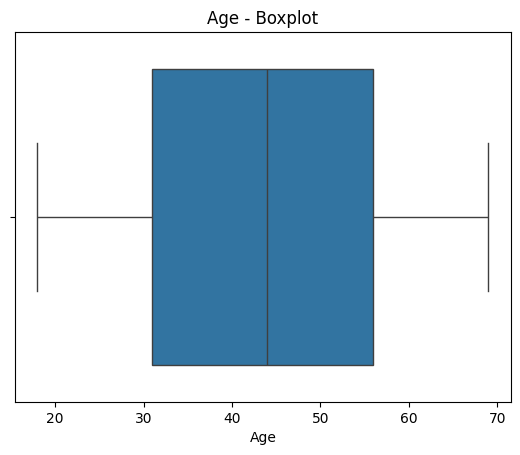

In [ ]:

#age değişkeni için çok düşük ya da çok yüksek yaş girildi mi kontrol ediliyor
# age değişkeni için aykırı değer bulunmamaktadır.

sns.boxplot(x=df_customer_experience['Age'])
plt.title('Age - Boxplot')
plt.show()


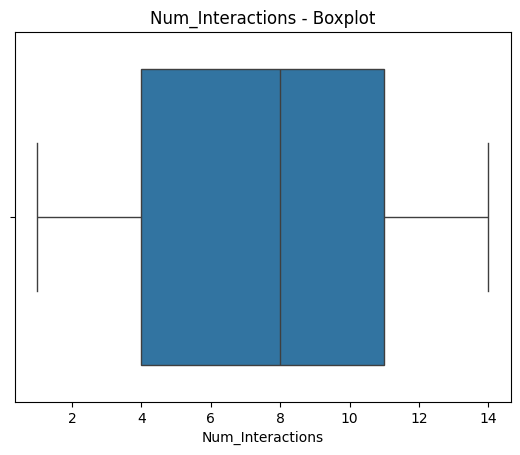

In [ ]:
#Num_Interactions için aykırı değer bulunmuyor
sns.boxplot(x=df_customer_experience['Num_Interactions'])
plt.title('Num_Interactions - Boxplot')
plt.show()


In [ ]:
#kontrol amaçlı sayısal olarak inceleniyor, aykırı değer yok.
Q1 = df_customer_experience["Num_Interactions"].quantile(0.25)
Q3 = df_customer_experience["Num_Interactions"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_customer_experience[(df_customer_experience["Num_Interactions"] < lower) | (df_customer_experience["Num_Interactions"] > upper)]
print(outliers.shape[0])


0


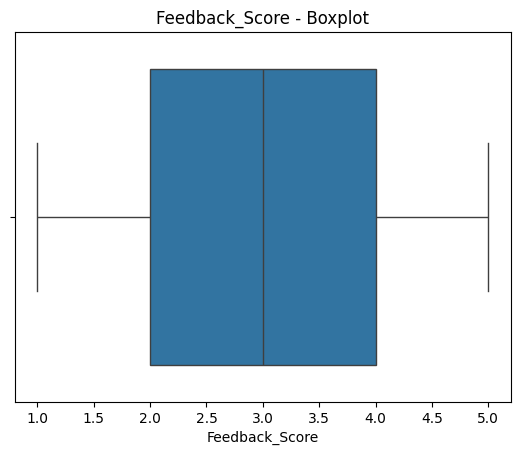

In [ ]:
# Feedback_Score değişkeni sınırları belli bir değişken olduğu yanlış veri girişi olup olmadığı kontol ediliyor
#aykırı değer bulunmuyor
sns.boxplot(x=df_customer_experience['Feedback_Score'])
plt.title('Feedback_Score - Boxplot')
plt.show()

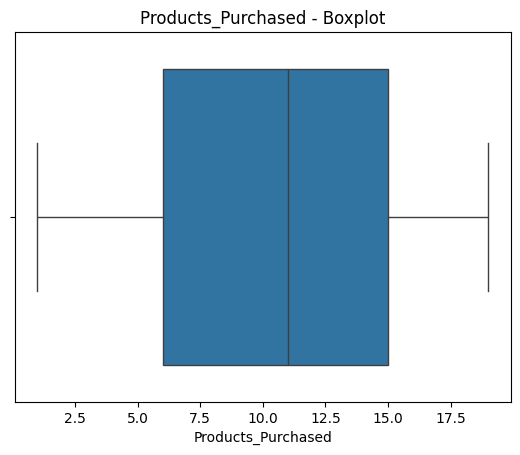

In [ ]:
# Products_Purchased için aykırı değer bulunmuyor.
sns.boxplot(x=df_customer_experience['Products_Purchased'])
plt.title('Products_Purchased - Boxplot')
plt.show()

In [ ]:
#kontrol amaçlı sayısal olarak inceleniyor, aykırı değer yok.
Q1 = df_customer_experience["Products_Purchased"].quantile(0.25)
Q3 = df_customer_experience["Products_Purchased"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_customer_experience[(df_customer_experience["Products_Purchased"] < lower) | (df_customer_experience["Num_Interactions"] > upper)]
print(outliers.shape[0])


0


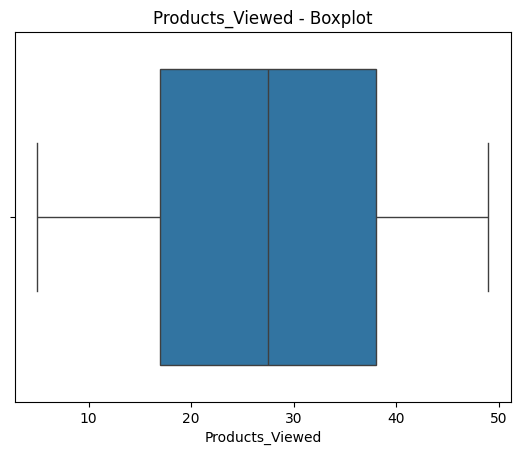

In [ ]:
#Products_Viewed için aykırı değer bulunmuyor

sns.boxplot(x=df_customer_experience['Products_Viewed'])
plt.title('Products_Viewed - Boxplot')
plt.show()

In [ ]:
#kontrol amaçlı sayısal olarak inceleniyor, aykırı değer yok.
Q1 = df_customer_experience["Products_Viewed"].quantile(0.25)
Q3 = df_customer_experience["Products_Viewed"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_customer_experience[(df_customer_experience["Products_Viewed"] < lower) | (df_customer_experience["Num_Interactions"] > upper)]
print(outliers.shape[0])

0


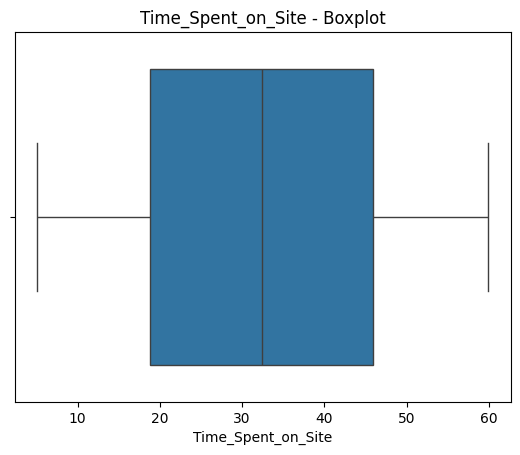

In [ ]:
#Time_Spent_on_Site için aykırı deper bulunmuyor
sns.boxplot(x=df_customer_experience['Time_Spent_on_Site'])
plt.title('Time_Spent_on_Site - Boxplot')
plt.show()


In [ ]:
#kontrol amaçlı sayısal olarak inceleniyor, aykırı değer yok.
Q1 = df_customer_experience["Time_Spent_on_Site"].quantile(0.25)
Q3 = df_customer_experience["Time_Spent_on_Site"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

outliers = df_customer_experience[(df_customer_experience["Time_Spent_on_Site"] < lower) | (df_customer_experience["Num_Interactions"] > upper)]
print(outliers.shape[0])

0


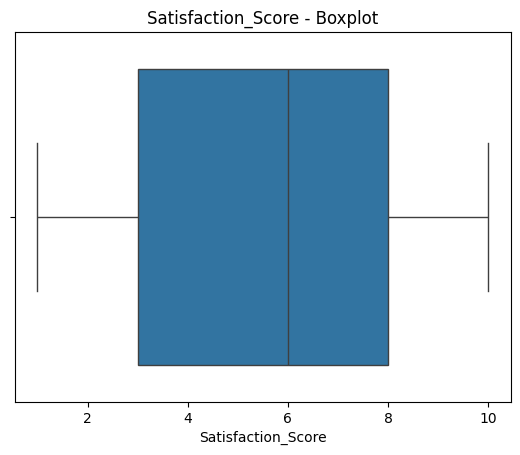

In [ ]:
# Satisfaction_Score değişkeni sınırları belli bir değişken olduğu yanlış veri girişi olup olmadığı kontol ediliyor
#aykırı değer bulunmuyor
sns.boxplot(x=df_customer_experience['Satisfaction_Score'])
plt.title('Satisfaction_Score - Boxplot')
plt.show()

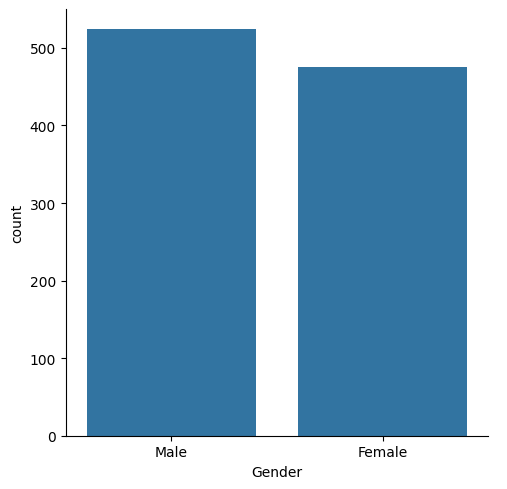

In [ ]:
#kategorik değişkenlerin grafiklerinin oluşturulması
#Erkek ve kadın müşteriler birbirine yakın sayıda, dengeli.

sns.catplot(x="Gender", kind="count",data=df_customer_experience)

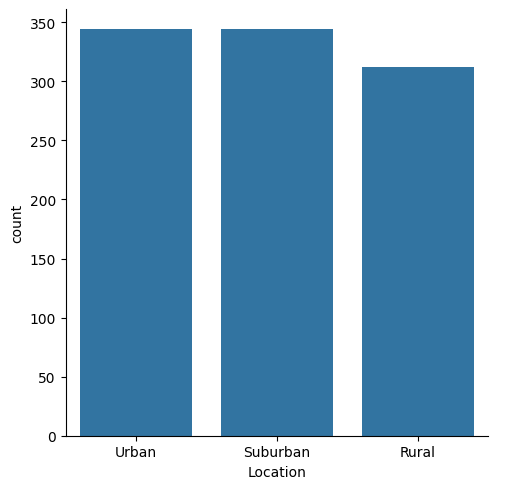

In [ ]:
# Rural (kırsal)dan gelen müşterilerin sayısı şehirden gelen(Suburban ve Urban) biraz daha az. Şehirli müşteriler az miktar fazla ve eşit.
sns.catplot(x="Location", kind="count",data=df_customer_experience)

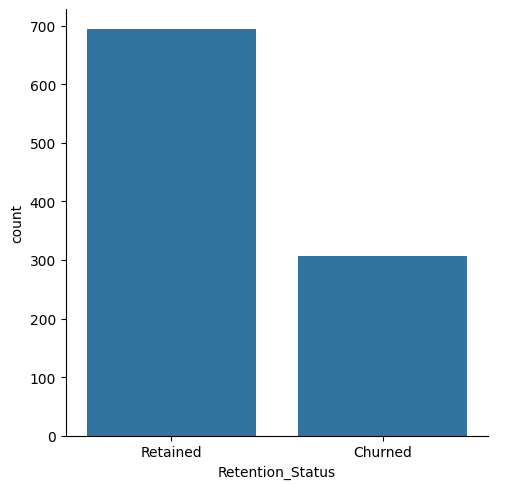

In [ ]:
# Yaklaşık 700 müşteri elde tutulmuş (Retained), yaklaşık 300’ü elde tutulalamış (Churned). Genel elde tutma oranı iyi görünüyor
sns.catplot(x="Retention_Status", kind="count",data=df_customer_experience)

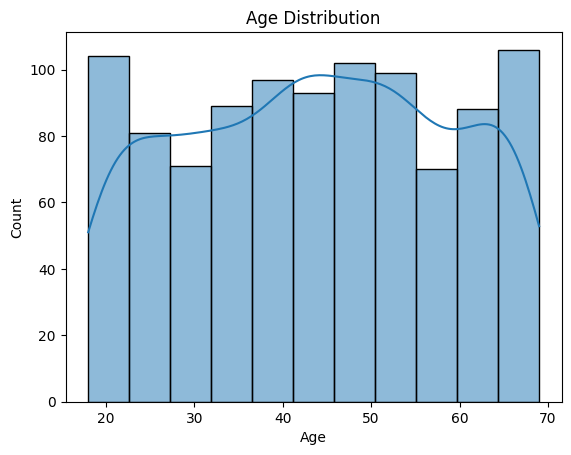

In [ ]:
#Numerik değişkenlerin dağılım grafikleri
#En kalabalık yaş grubu 40–50 civarı. yaş aralığı 19-69'tur.

sns.histplot(df_customer_experience['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

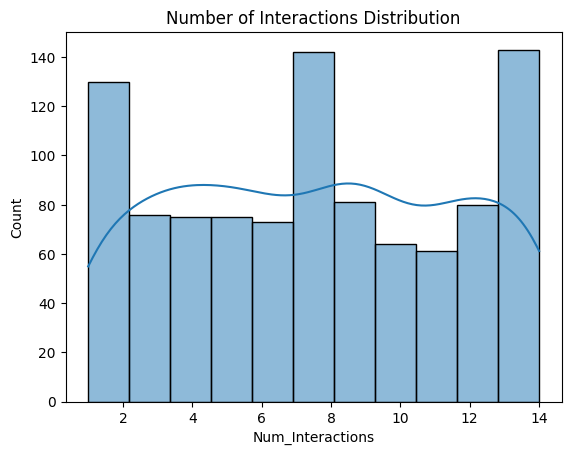

In [ ]:
#1–2 kez, orta düzeyde 7–8 ve sık 13–14 kez etkileşime giren kullanıcılar olarak 3 yerde yoğunlaşma görülüyor.
sns.histplot(df_customer_experience['Num_Interactions'], kde=True)
plt.title('Number of Interactions Distribution')
plt.show()

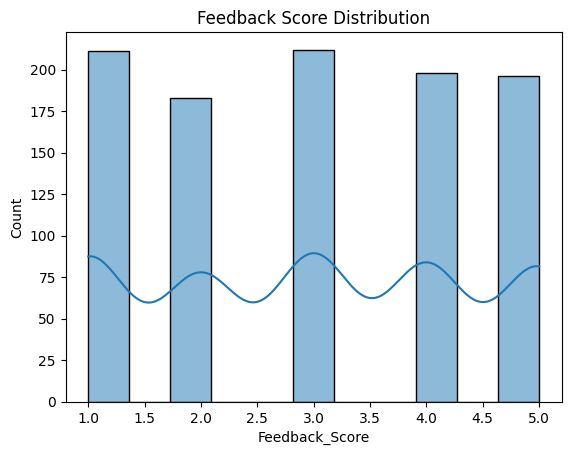

In [ ]:
#Geribildirim puanlarının genel olarak birbirine yakın yoğunlukta olduğu görülmektedir. 3 puanın biraz daha yüksek yoğunlukta olduğu görülmekte.
sns.histplot(df_customer_experience['Feedback_Score'], kde=True)
plt.title('Feedback Score Distribution')
plt.show()

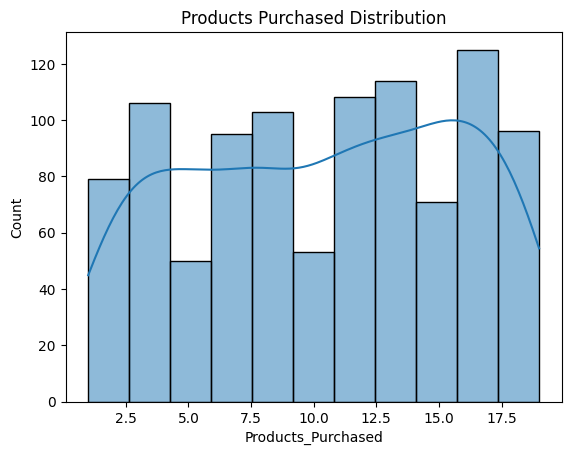

In [ ]:
# uç değerlerde alım yoğunluğu az olup 7-14 arası alım yoğunluğunun fazla oluğu görülmektedir.
sns.histplot(df_customer_experience['Products_Purchased'], kde=True)
plt.title('Products Purchased Distribution')
plt.show()

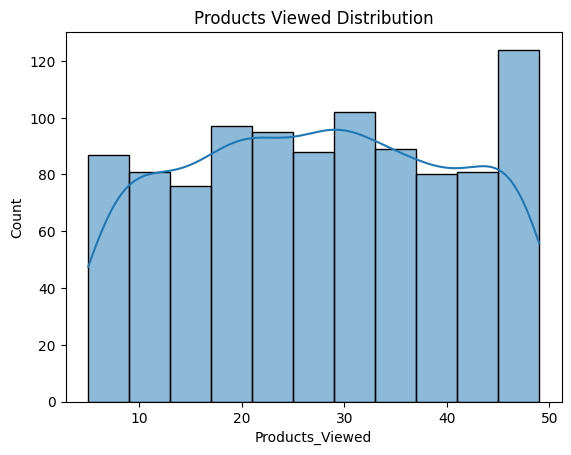

In [ ]:
# Görüntülenmenin 20–30 ürün aralığında en yüksek yoğunlukta uç değerlerde düşük olduğu görülmektedir.
sns.histplot(df_customer_experience['Products_Viewed'], kde=True)
plt.title('Products Viewed Distribution')
plt.show()

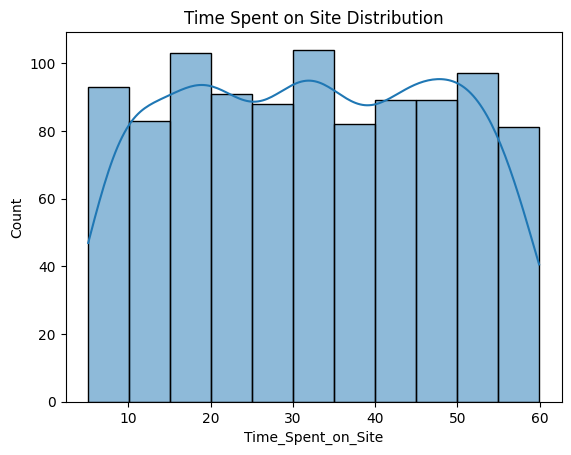

In [ ]:
# Sitede geçirilen zamanın Uç değerler hariç dengeli olduğu görülmektedir.
sns.histplot(df_customer_experience['Time_Spent_on_Site'], kde=True)
plt.title('Time Spent on Site Distribution')
plt.show()

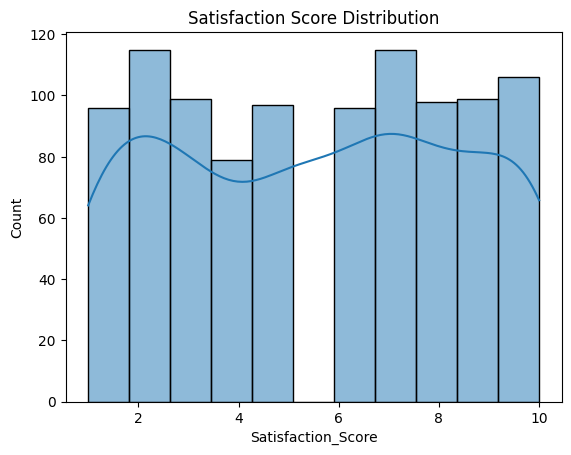

In [ ]:
# Memnuniyet skorunun genel olarak dengeli olduğu yalnızca 2 ve 7 puanlarda hafifçe daha yüksek yoğunlukta olduğu görülmektedir.
sns.histplot(df_customer_experience['Satisfaction_Score'], kde=True)
plt.title('Satisfaction Score Distribution')
plt.show()

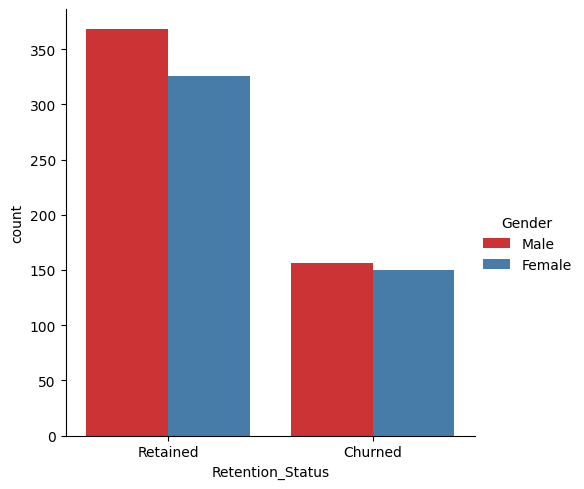

In [ ]:
#retentation status(Müşteri Elde Tutma Durumu)nu etkileyen değişkenleri inceleyelim

#Oluşturulan grafikte cinsiyetin müşteri elde tutulma oranı üzerinde anlamlı bir farklılık yaratmadığı görülmektedir.
sns.catplot(x="Retention_Status",kind="count",hue="Gender", data=df_customer_experience,palette="Set1")

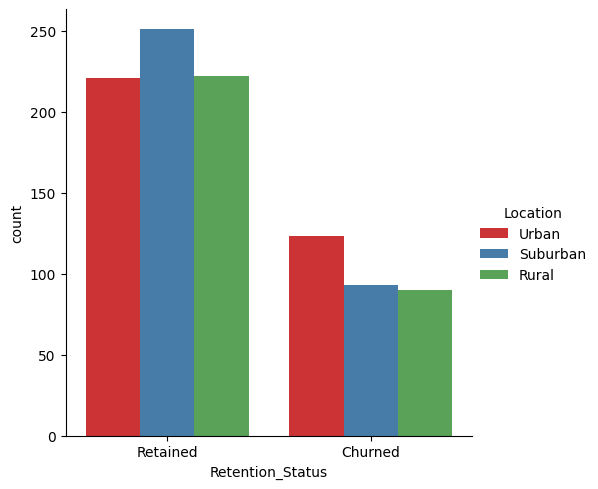

In [ ]:
#Grafiğe göre retention oranları (tutma oranları) benzer; Suburban (banliyö) ve Rural (kırsal) bölgelerde hafif daha yüksek, Urban (kentsel) bölgede biraz daha düşük olsa da üç bölge arasında güçlü bir ayrım gözlenmiyor

sns.catplot(x="Retention_Status",kind="count",hue="Location", data=df_customer_experience,palette="Set1")



In [ ]:
#mean değerlerini inceleyelim
df_customer_experience.groupby('Location')['Retention_Status_Encoded'].mean()

,Retention_Status_Encoded
Location,
Rural,0.711538
Suburban,0.729651
Urban,0.642442


<Axes: xlabel='Retention_Status', ylabel='Satisfaction_Score'>

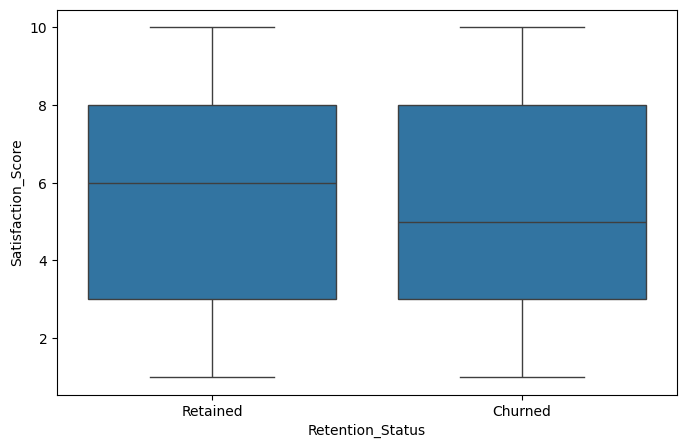

In [ ]:
#Grafikte retained kullanıcıların memnuniyet puanlarının medyanı 6 iken churned kullanıcılarınki 5’tir; bu da memnuniyetin retention üzerinde olumlu bir etkisi olduğunu göstermeketedir
plt.figure(figsize=(8,5))
sns.boxplot(x="Retention_Status",y="Satisfaction_Score", data=df_customer_experience)

In [ ]:
# İstatiksel olarak mean,medianları inceleyelim
df_customer_experience.groupby("Retention_Status")["Satisfaction_Score"].mean()

,Satisfaction_Score
Retention_Status,
Churned,5.398693
Retained,5.602305


In [ ]:
df_customer_experience.groupby("Retention_Status")["Satisfaction_Score"].median()

,Satisfaction_Score
Retention_Status,
Churned,5.0
Retained,6.0


<Axes: xlabel='Retention_Status', ylabel='Feedback_Score'>

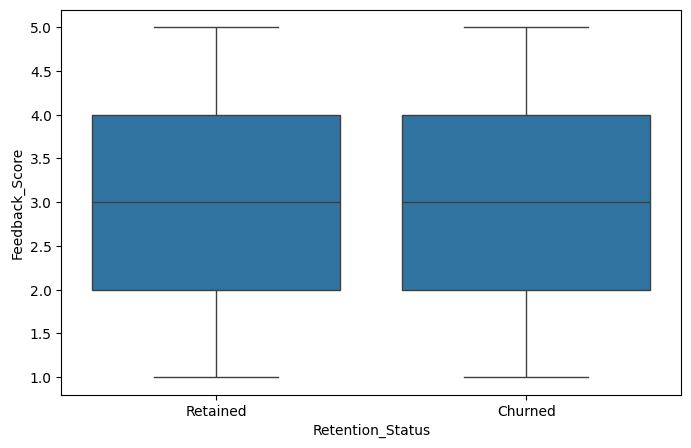

In [ ]:
##Grafikte geri bildirim skorlarının (Satisfaction Score)nun elde tutulan ve tutulamayan müşterilerin boxlarının aynı seviyeye çok yakın olmaları bu değişkenin retentation üzerinde etkili olmadığını göstermektedir.
plt.figure(figsize=(8,5))
sns.boxplot(x="Retention_Status",y="Feedback_Score", data=df_customer_experience)

<Axes: xlabel='Retention_Status', ylabel='Time_Spent_on_Site'>

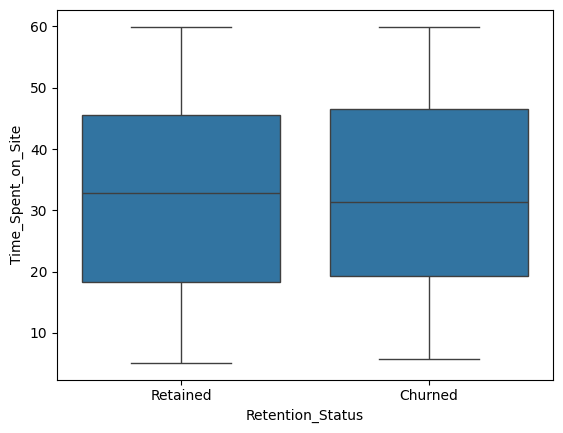

In [ ]:
#Time_Spent_on_Site boxplot’una göre elde tutulan müşterilerin medyan oturum süresi (~33 dk), tutulamayanlara (~31 dk) göre biraz daha yüksek; ancak bu fark, memnuniyet puanlarındaki fark kadar belirgin değil, dolayısıyla süre faktörünün etkisi sınırlı görünüyor
sns.boxplot(x="Retention_Status",y="Time_Spent_on_Site", data=df_customer_experience)

In [ ]:
# İstatiksel olarak mean,medianları inceleyelim
df_customer_experience.groupby('Retention_Status')['Satisfaction_Score'].mean()

,Satisfaction_Score
Retention_Status,
Churned,5.398693
Retained,5.602305


In [ ]:
df_customer_experience.groupby("Retention_Status")["Time_Spent_on_Site"].median()

,Time_Spent_on_Site
Retention_Status,
Churned,31.42778
Retained,32.78584


In [ ]:
## Kapanış Bulguları
#Memnuniyet skoru yükseldikçe retention artıyor** (retained medyan 6, churned 5).
#Sitede geçirilen süre retained grupta biraz daha uzun**, fakat etkisi memnuniyete göre zayıf.
#Feedback puanı, cinsiyet, konum ve etkileşim sayısı retention’da belirgin fark yaratmadı.
#Öncelik: Memnuniyeti artırmak ve site deneyimini iyileştirmek, müşteri bağlılığını güçlendirecek en etkili adım.

#Eksik değer ve kritik aykırı değer yok.

#Temel İstatistikler: Sayısal değişkenler (yaş, etkileşim, süre, puanlar) beklenen aralıklarda; ortalama–medyan değerleri birbirine yakın.
